In [7]:
import cv2
import numpy as np
import dlib
from PIL import Image, ImageDraw, ImageFilter

In [24]:
img1 = cv2.imread("ted.jpg")
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread("paul.jpg")
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

mask1 = np.zeros_like(img1_gray)
mask2 = np.zeros_like(img2_gray)
convexhull1 = 0
convexhull2 = 0



In [9]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
faces = detector(img1_gray)
for face in faces:
    landmarks = predictor(img1_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))


    points = np.array(landmarks_points, np.int32)
    convexhull1 = cv2.convexHull(points)
    #cv2.polylines(img, [convexhull], True, (255, 0, 0), 3)
    cv2.fillConvexPoly(mask1, convexhull1, 255)
    face_image_1 = cv2.bitwise_and(img1, img1, mask=mask1)

In [10]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
faces = detector(img2_gray)

for face in faces:
    landmarks = predictor(img2_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))


    points = np.array(landmarks_points, np.int32)
    convexhull2 = cv2.convexHull(points)
    #cv2.polylines(img, [convexhull], True, (255, 0, 0), 3)
    cv2.fillConvexPoly(mask2, convexhull2, 255)
    face_image_2 = cv2.bitwise_and(img2, img2, mask=mask2)

In [12]:
# cv2.imshow("Image 1", img1)
# cv2.imshow("Face image 1", face_image_1)
# cv2.imshow("Image 2", img2)
cv2.imwrite("paul_face.jpg", face_image_2)

cv2.imwrite('ted_mask.jpg', mask1)
cv2.imwrite('paul_mask.jpg', mask2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
x,y,w,h = cv2.boundingRect(convexhull1)
center = (x+w,y+h)

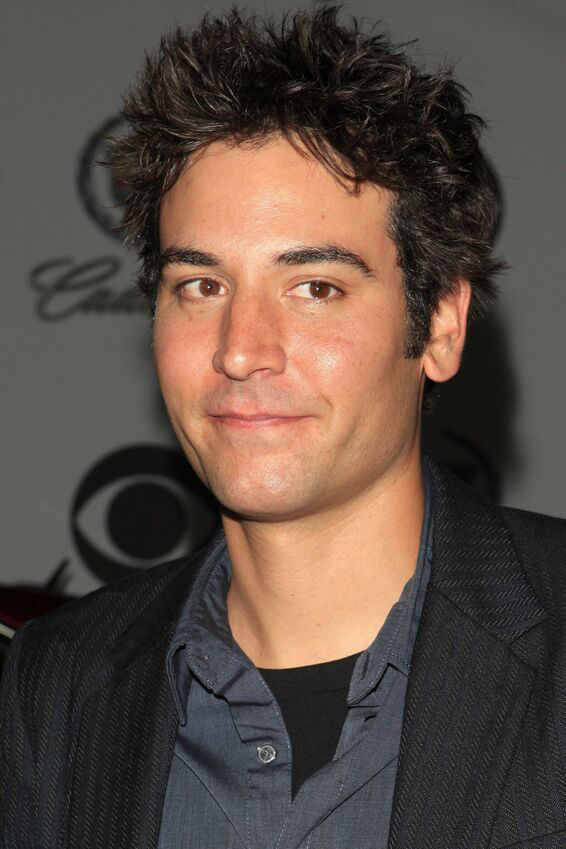

In [21]:
im1 = Image.open('ted.jpg')
im2 = Image.open('paul.jpg')
im3=im1.copy()
mask1 = Image.open('ted_mask.jpg')
im3.paste(im2, (0,0), mask1)
im3.save('paste.jpg', quality=95)
im1


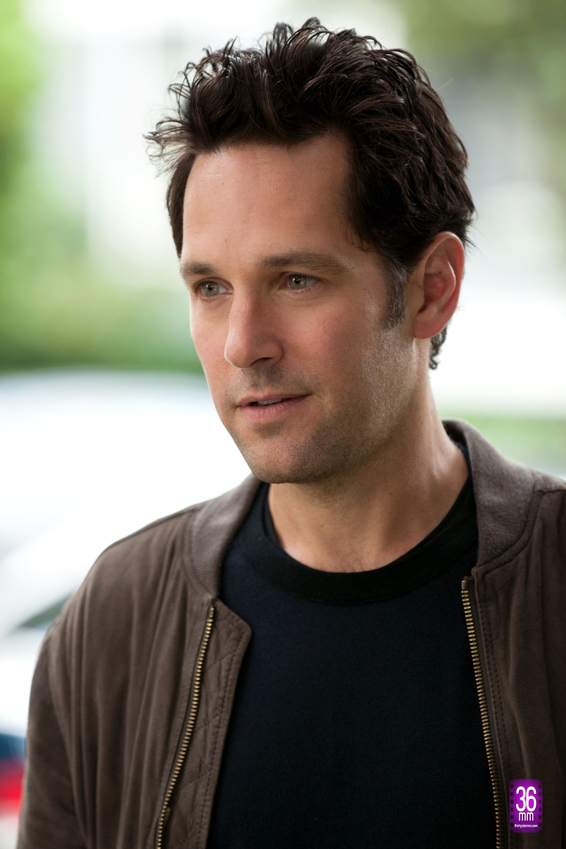

In [22]:
im2

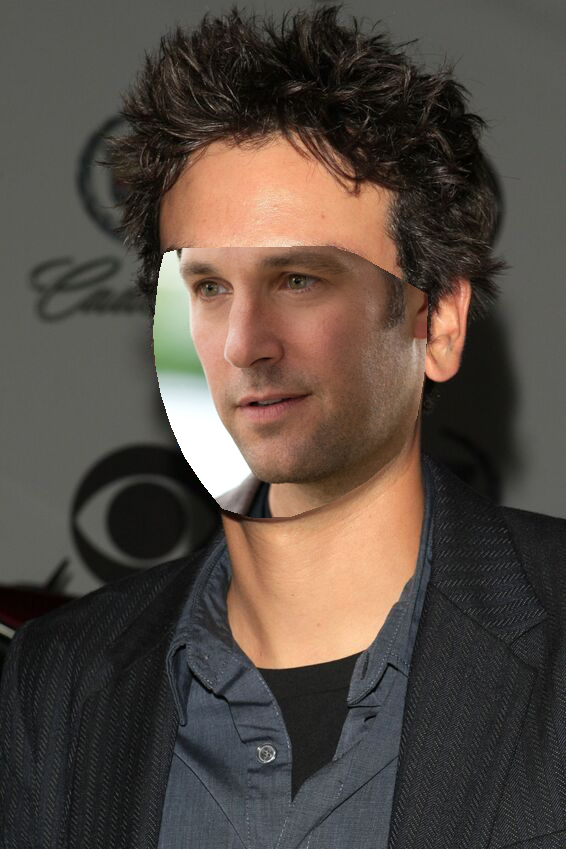

In [23]:
im3